# Distribuzioni dei dati
Utilizzeremo un semplice dataset di esempio contenente osservazioni relativi a pesi e altezze di diversi soggetti. Il dataset è disponibile al seguente URL: http://iplab.dmi.unict.it/furnari/downloads/height_weight.csv.

Carichiamo il dataset mediante la libreria Pandas e visualizziamo alcune informazioni sul DataFrame:

In [1]:
import pandas as pd
data=pd.read_csv('http://iplab.dmi.unict.it/furnari/downloads/height_weight.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
sex       4231 non-null object
BMI       4231 non-null float64
height    4231 non-null float64
weight    4231 non-null float64
dtypes: float64(3), object(1)
memory usage: 132.3+ KB


Il dataset contiene $4321$ osservazioni e $4$ colonne. In particolare, per ogni soggetto sono riportati:
 * Il sesso (sex);
 * Il body mass index (BMI);
 * L'altezza in cm (height);
 * Il peso in Kg (weight).
Visualizziamo le prime righe del dataframe:

In [2]:
data.head()

,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


Dato che ci occuperemo in una prima fase di dati univariati, ogni colonna del dataframe costituirà per noi un campione a se stante.

## Probability Mass Function (PMF)

### Diagramma a barre delle frequenze assolute
Un primo modo di descrivere il campione consiste nel calcolare la frequenza con la quale appaiono i suoi elementi. Ciò può essere fatto mediante il metodo `value_counts`. Visualizziamo ad esempio, le frequenze dei valori di altezza:

In [3]:
height_counts = data['height'].value_counts()
height_counts

162.56    435
167.64    391
170.18    377
172.72    355
165.10    351
175.26    302
160.02    291
177.80    272
182.88    260
157.48    259
180.34    235
154.94    152
185.42    146
152.40    130
187.96    104
190.50     72
149.86     52
193.04     47
Name: height, dtype: int64

In metodo restituisce una `Series` di `Pandas` che ha come _indici_ i valori unici delle altezze e come _valori_ le frequenze dei valori unici. Gli elementi della serie sono ordinati per valore (e dunque per frequenza). Sappiamo dunque che il primo elemento della serie è il più frequente, mentre l'ultimo è il meno frequente:

In [4]:
print("Altezza più frequente:",height_counts.iloc[0])
print("Altezza meno frequente:",height_counts.iloc[-1])

Altezza più frequente: 435
Altezza meno frequente: 47


> **🙋‍♂️ Domanda 1**
>
> Scrivendo:
> ```python
> print("Altezza più frequente:",height_counts[0])
> print("Altezza meno frequente:",height_counts[-1])
> ```
> 
> otteniamo lo stesso risultato? Perché?

In genere, torna utile riordinare la serie ottenuta per indice, in modo da ottenere una serie di valori crescente con le relative frequenze.

In [5]:
data['height'].value_counts().sort_index()

149.86     52
152.40    130
154.94    152
157.48    259
160.02    291
162.56    435
165.10    351
167.64    391
170.18    377
172.72    355
175.26    302
177.80    272
180.34    235
182.88    260
185.42    146
187.96    104
190.50     72
193.04     47
Name: height, dtype: int64

Le frequenze dei dati possono essere rappresentate graficamente mediante un grafico a barre utilizzando le funzionalità di plot di `Pandas`. Tali funzionalità si appoggiano a matplotlib, per cui, per avere maggiore controllo su di esse dobbiamo importare `pyplot`:

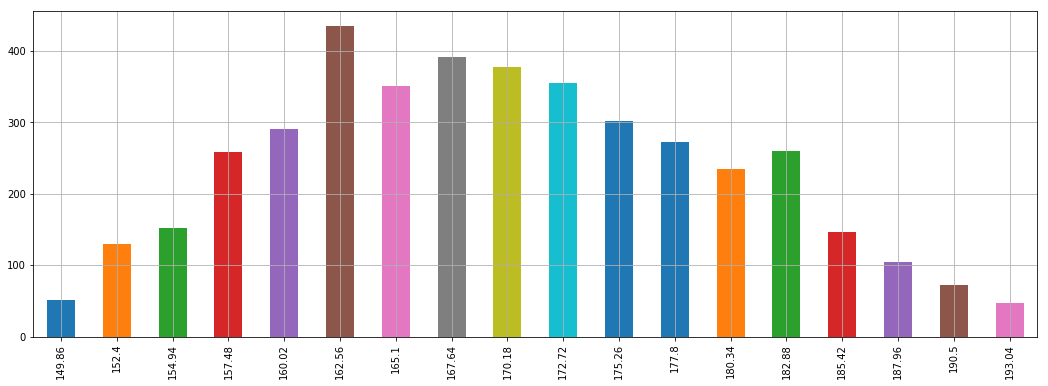

In [46]:
from matplotlib import pyplot as plt
data['height'].value_counts().sort_index().plot.bar(figsize=(18,6))
plt.grid()
plt.show()

dove il parametro `figsize=(12,6)` serve a specificare le dimensioni del plot, mentre `plt.grid()` serve a mostrare una griglia sovrapposta al plot.

Il grafico ottenuto è detto **digramma a barre delle frequenze assolute** e mostra il numero di volte in cui ciascun valore appare nel campione.

> **🙋‍♂️ Domanda 2**
>
> Che cosa ci dice la rappresentazione dei dati sopra? Quali sono i valori più frequenti? Quante persone hanno un'altezza pari a $167.64\ cm$?

Si noti che, alternativamente, è possibile plottare un grafico a barre direttamente tramite matplotlib come segue:

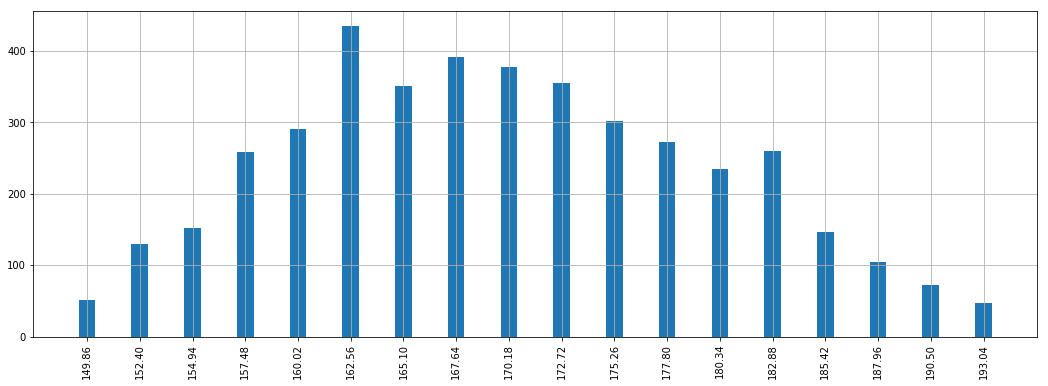

In [7]:
plt.figure(figsize=(18,6))
height_counts = data['height'].value_counts().sort_index()
plt.bar(height_counts.index, height_counts.values)
plt.xticks(height_counts.index, rotation='vertical')
plt.grid()
plt.show()

In molti casi sarà possibile utilizzare le funzioni compatte messe a disposizione da Pandas, mentre in altri sarà necessario utilizzare matplotlib esplicitamente.

### Probability Mass Function
L'istrogamma assoluto delle frequenze ci permette già di farci un'idea sulla distribuzione dei dati. Sappiamo ad esempio che il campione contiene più individui di altezza pari a $167.64\ cm$ che individui di altezza pari a $193,04\ cm$. Tuttavia, tale rappresentazione non ci permette di ragionare in termini probabilistici e di rispondere a domande del genere "se scelgo un elemento a caso dal compione, qual è la probabilità di ottenre un individuo alto esattamente $167.54\ cm$?". Per ragionare in termini probabilistici dobbiamo costruire una Probability Mass Function $f$ che rispetti le seguenti due regole:

\begin{equation}
0 \leq f(x_i) \leq 1\ \ \forall i=1,\ldots,N \\
\sum_i^Nf(x_i) = 1
\end{equation}

Le due regole sono soddisfatte dividendo le freqyebze per il numero di osservazioni presenti nel campione:

In [8]:
data['height'].value_counts().sort_index()/len(data['height'].dropna())

149.86    0.012290
152.40    0.030726
154.94    0.035925
157.48    0.061215
160.02    0.068778
162.56    0.102813
165.10    0.082959
167.64    0.092413
170.18    0.089104
172.72    0.083905
175.26    0.071378
177.80    0.064287
180.34    0.055542
182.88    0.061451
185.42    0.034507
187.96    0.024580
190.50    0.017017
193.04    0.011108
Name: height, dtype: float64

O, alternativamente, specificando `normalize=True` (dividere per la somma degli elementi è un forma di normalizzazione) come parametro per `value_counts`:

In [9]:
data['height'].value_counts(normalize=True).sort_index()

149.86    0.012290
152.40    0.030726
154.94    0.035925
157.48    0.061215
160.02    0.068778
162.56    0.102813
165.10    0.082959
167.64    0.092413
170.18    0.089104
172.72    0.083905
175.26    0.071378
177.80    0.064287
180.34    0.055542
182.88    0.061451
185.42    0.034507
187.96    0.024580
190.50    0.017017
193.04    0.011108
Name: height, dtype: float64

Come si può vedere, tutti i numeri sono compresi tra zero e uno. Inoltre, la somma dei valori è pari a 1:

In [10]:
print("{:0.2f}".format(data['height'].value_counts(normalize=True).sort_index().sum()))

1.00


La rappresentazione grafica che si ottiene è detta **diagramma a barre delle frequenze** e rappresenta una **probability mass function (PMF)** che associa ad **ogni valore discreto** presente nel campione una **probabilità**:

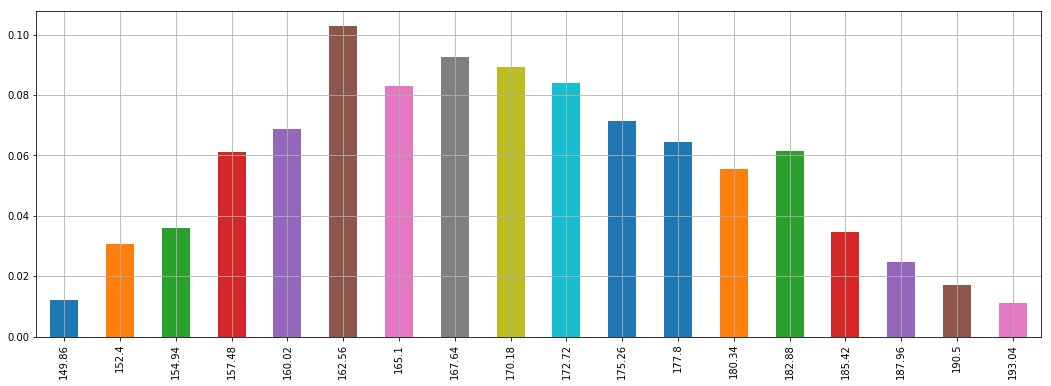

In [11]:
(data['height'].value_counts(normalize=True).sort_index()).plot.bar(figsize=(18,6))
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 3**
>
> Cosa hanno in comune (graficamente) il diagramma a barre delle frequenze assolute e il diagramma a barre delle frequenze relative? Che cosa ci dice in più una rappresentazione rispetto all'altra?

Le **PMF** possono essere utili anche per confrontare diversi campioni di dati. Consideriamo ad esempio le altezze delle donne e degli uomini come due campioni separati nel dataset e calcoliamone le **PMF**:

In [12]:
pmf_height_m = data[data['sex']=='M']['height'].value_counts(normalize=True).sort_index()
pmf_height_f = data[data['sex']=='F']['height'].value_counts(normalize=True).sort_index()

Mostriamo i due istogrammi mettendoli a confronto. Per poter mostrare i due istogrammi agevolemente nello stesso grafico, utilizzeremo matplotlib:

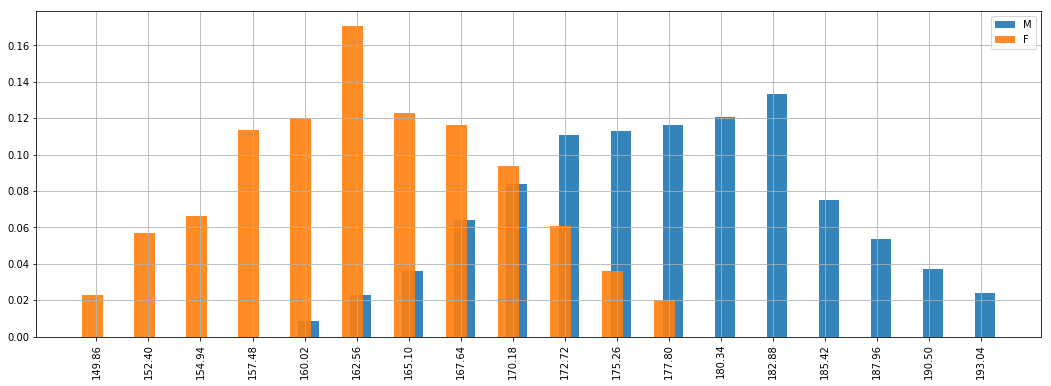

In [13]:
plt.figure(figsize=(18,6))
#sommiamo e sottraiamo 0.2 agli indici per "spostare" le barre e renderle
#visibili quando sovrappose. Inoltre impostiamo alpha=0.9 per rendere le barre
#parzialmente trasparenti
plt.bar(pmf_height_m.index+0.2, pmf_height_m.values, width=1, alpha=0.9)
plt.bar(pmf_height_f.index-0.2, pmf_height_f.values, width=1, alpha=0.9)
plt.xticks(data['height'].unique(), rotation='vertical')
plt.legend(['M','F']) #mostriamo una legenda
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 4**
>
> Cosa ci dicono i due plot? Quale delle due classi ('F' o 'M') contiene i soggetti più bassi? Esistono soggetti di sesso femminile alti? Esistono soggetti di sesso maschile bassi? Quanto sono "probabili"?

## Cumulative Distribution Function (CDF)

Le **PMF** funzionano particolarmente bene quando i valori unici sono pochi. Quando invece il numero di valori univoci cresce, le probabilità discrete calcolate per i valori diventano molto piccole e dunque soggette al rumore (ad esempio dovuto ad errori di misura). Proviamo a plottare la **PMF** dei pesi:

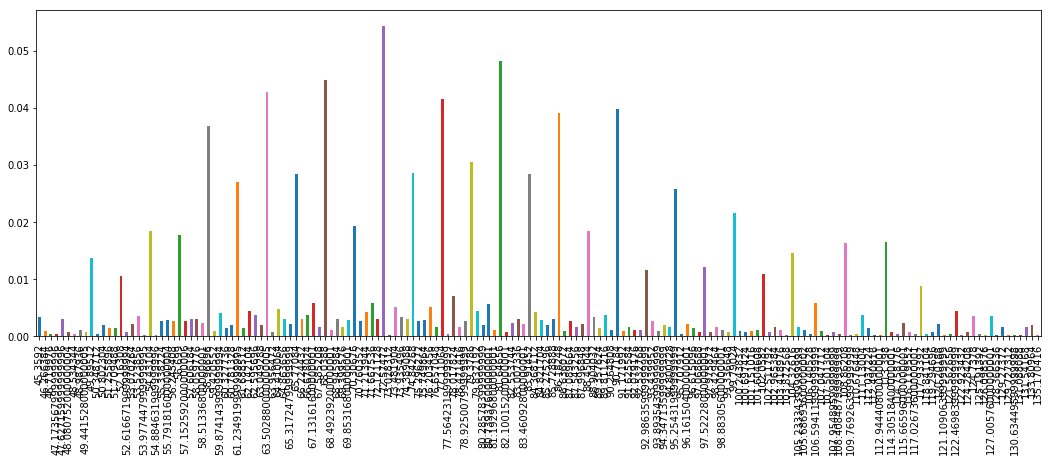

In [14]:
data['weight'].value_counts(normalize=True).sort_index().plot.bar(figsize=(18,6))
plt.show()

Nel grafico sopra, il numero di valori univoci e così alto da non permetterne la lettura come etichette dell'asse delle $x$. Possiamo ottenere una situazione più leggibile usando matplotlib:

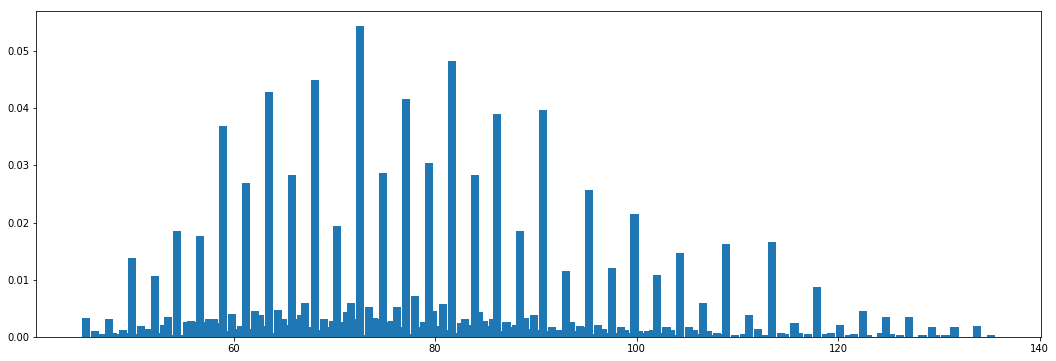

In [15]:
hist=data['weight'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(18,6))
plt.bar(hist.index,hist.values)
plt.show()

> **🙋‍♂️ Domanda 5**
>
> La distribuzione sopra presenta alcuni valori poco frequenti tra valori molto frequenti. Si tratta di una caratteristica della distribuzione, o si tratta di un limite della rappresentazione scelta?

Supponiamo adesso di voler confrontare le distribuzioni dei pesi di donne e uomini:

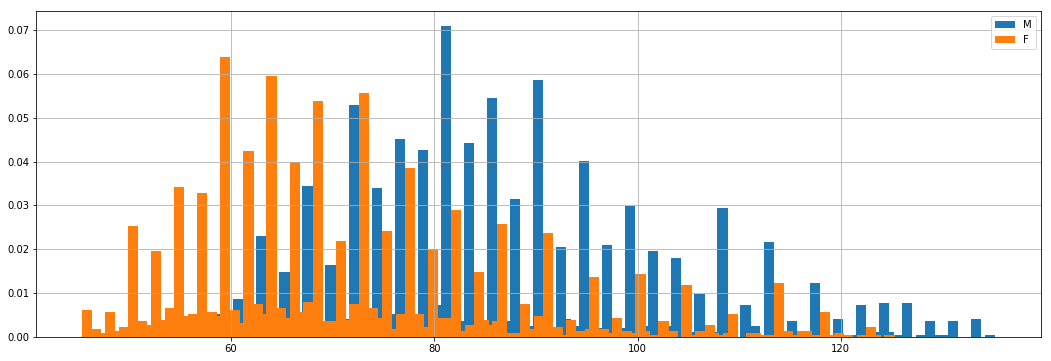

In [16]:
pmf_weight_m = data[data['sex']=='M']['weight'].value_counts(normalize=True).sort_index()
pmf_weight_f = data[data['sex']=='F']['weight'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(18,6))
plt.bar(pmf_weight_m.index-0.5, pmf_weight_m.values, width=1)
plt.bar(pmf_weight_f.index+0.5, pmf_weight_f.values, width=1)
plt.legend(['M','F'])
plt.grid()
plt.show()

Le due rappresentazioni sono affette da rumore dovuto alla natura discreta dei dati per cui due valori molto vicini (es. $60\ cm$ e $60.1\ cm$) vengono trattati come due casi distinti nel calcolo delle probabilità. Vedremo alcuni modi per ovviare a questo problema. Uno di essi consiste nell'utilizzare una **Cumulative Distribution Function (CDF)**. Una **CDF** mappa un valore $x$ del campione al relativo "ordine di quantile", ovvero alla frazione di valori del campione che sono minori o uguali a $x$. Ad esempio, se il valore $x$ è il quantile $0.25$ (il $25\%$ dei valori sono minori o uguali a $x$), la **CDF** assocerà a $x$ proprio il valore $0.25$. Possiamo calcolare le **CDF** dei due campioni di pesi a partire dalle rispettive **PMF** avvalendoci della funzione **cumsum**.

La funzione cumsum di una serie di valori calcola ad ogni posizione $i$ la somma dei primi $i$ valori. Ad esempio:

In [17]:
a = pd.Series([1,3,6,8,9])
a.cumsum()

0     1
1     4
2    10
3    18
4    27
dtype: int64

Dal momento che le **PMF** sono ordinate, la funzione **cumsum** calcola per ogni indice la somma delle probabilità dei valori precedenti. Calcoliamo le **CDF** dei due campioni e confrontiamoli:

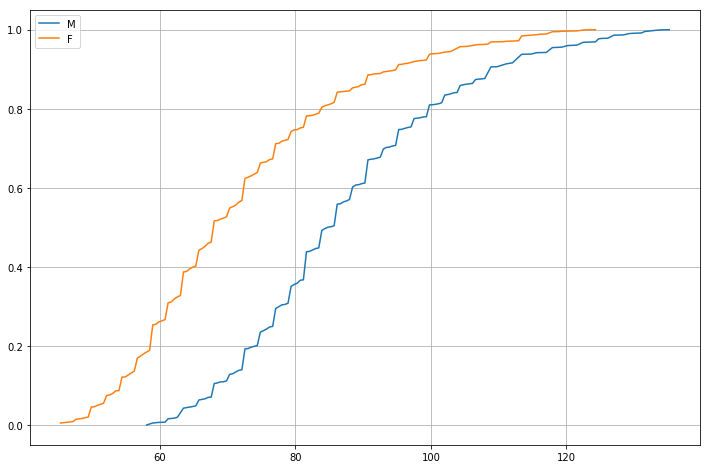

In [18]:
cdf_weight_m = data[data['sex']=='M']['weight'].value_counts(normalize=True).sort_index().cumsum()
cdf_weight_f = data[data['sex']=='F']['weight'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(12,8))
plt.plot(cdf_weight_m.index, cdf_weight_m.values)
plt.plot(cdf_weight_f.index, cdf_weight_f.values)
plt.legend(['M','F'])
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 6**
>
> Il confronto è adesso più chiaro? Quale dei due campioni contiene i pesi maggiori?


Le CDF tornano utili per verificare graficamente se due fenomeni obbediscono alla stessa densità di probabilità o meno. Prendiamo ad esempio il dataset "Titanic", visto negli scorsi laboratori:

In [19]:
titanic = \
pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')

Confrontiamo adesso le distribuzioni delle età dei passeggeri di sesso maschile e femminile:

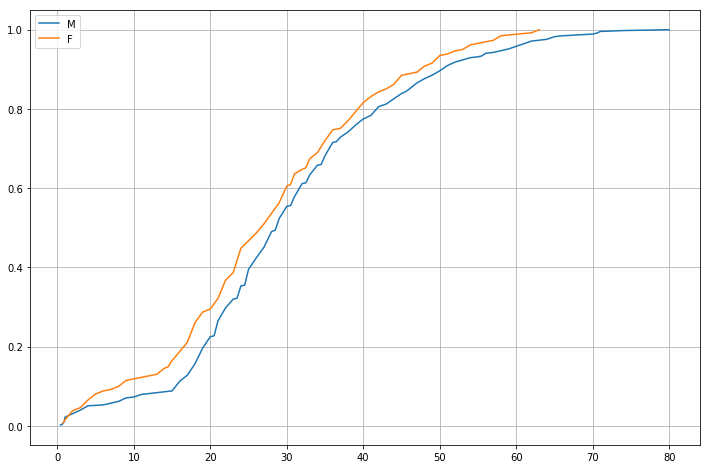

In [20]:
a=titanic[titanic['Sex']=='male']['Age'].value_counts(normalize=True).sort_index().cumsum()
b=titanic[titanic['Sex']=='female']['Age'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(12,8))
plt.plot(a.index,a.values)
plt.plot(b.index,b.values)
plt.grid()
plt.legend(['M','F'])
plt.show()

Com'è possibile vedere, in questo caso le due curve hanno delle forme molto simili. Ciò suggerisce che i due fenomeni obbediscono a simili densità di probabilità. Tuttavia è possibile notare che le donne tendono ad essere più giovani degli uomini.

## 4 Approssimare una PDF - Istogrammi

Idealmente, sarebbe utile conoscere la Probability Density Function (PDF) della popolazione dalla quale è stato estratto il campione. Una PDF è l'analogo di una PMF nel caso in cui la variabile di riferimento sia considerata continua. In pratica, passare da una PMF a una PDF permette di descrivere meglio il fenomeno e ridurre l'influenza del rumore dovuto alle rilevazioni. Un modo per approssimare una PDF direttamente dai dati, consiste nel dividere il range dei dati in un certo numero di "bin" e costruire un "istogramma". Questa rappresentazione ha lo scopo di "approssimare" la PDF (continua) della popolazione di riferimento. Possiamo plottare un istogramma con matplotlib come segue:

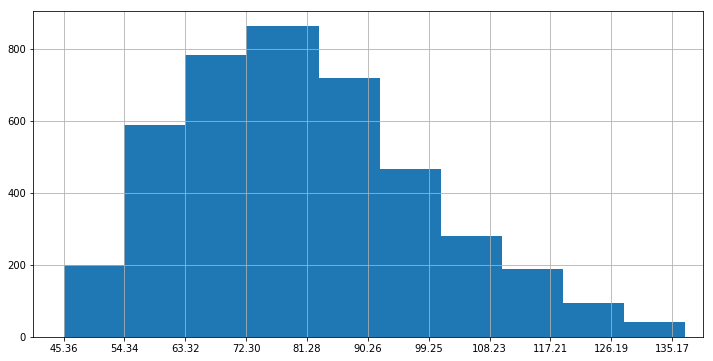

In [21]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(data['weight'], width=10.8)
plt.xticks(edges)
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 7**
>
> Si confronti questa rappresentazione dei dati con un istrogramma delle frequenze. Quale delle due rappresentazioni è più appropriata per i dati considerati? Perché?


Oltre a graficare l'istogramma, la funzione **plt.hist** restituisce tre valori:
 * un vettore contenente i valori dell'istogramma;
 * i "bordi" di ogni bin;
 * una lista di handle agli elementi grafici visualizzati.
 
Nell'esempio sopra abbiamo utilizzato la notazione `_,edges,_=...` per scartare il primo e l'ultimo valore e ottenere i "bordi" dell'istogramma.

Il numero di bin può essere specificato mediante il parametro `bin`. Calcoliamo il numero di bin mediante i criteri di di Struges ($\#bins=3.3\log(n)$) e Rice ($\#bins=2\cdot n^{1/3}$) e plottiamo nuovamente l'istogramma:

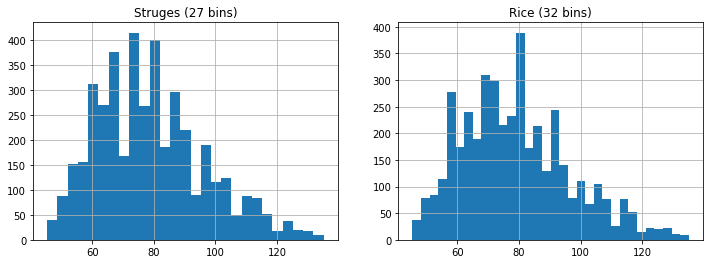

In [22]:
import numpy as np
bins_struges=int(3.3*np.log(len(data['weight'])))
bins_rice=int(2*len(data['weight'])**(1/3))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Struges ({} bins)'.format(bins_struges))
plt.hist(data['weight'], bins=bins_struges)
plt.grid()
plt.subplot(1,2,2)
plt.title('Rice ({} bins)'.format(bins_rice))
plt.grid()
plt.hist(data['weight'], bins=bins_rice)
plt.show()

E' possibile anche specificare i "bordi" dei bin esplicitamente:

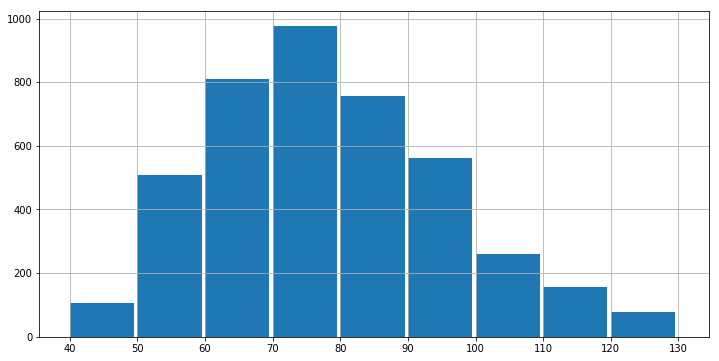

In [23]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(data['weight'], bins=[40,50,60,70,80,90,100,110,120,130], 
                   width=9.5) #costruiamo un istogramma con i bin definiti
plt.xticks(edges)
plt.grid()
plt.show()

L'istogramma mostrato sopra riporta le frequenze assolute per ogni bin e ci permette di rispondere a domande del genere "quanti soggetti hanno un peso compreso tra $70 Kg$ e $80 Kg$"?

> **🙋‍♂️ Domanda 8**
>
> Si costruiscano degli istogrammi per rispondere alle domande 
> * quanti soggetti di sesso maschile hanno un peso compreso tra $70Kg$ e $80Kg$?
> * quanti soggetti di sesso femminile hanno un peso compreso tra $60Kg$ e $65Kg$?

### Istogrammi di densità
L'istogramma mostrato sopra non ci permette di ragionare in termini probabilistici. Ad esempio, non ci permette di dire qual è la probabilità che un soggetto abbia un peso contenuto tra $70\ Kg$ e $80\ Kg$. Se avessimo la PDF della popolazione dalla quale è stata estratto il campione, potremmo rispondere a questa domanda calcolando l'integrale:

\begin{equation}
\int_{70}^{80} pdf(x) dx
\end{equation}

Possiamo costruire un **istogramma di densità**, che approssimi in maniera discreta la PDF che cerchiamo. In pratica, vogliamo che l'area sottesa dal bin di "bordi" $[70, 80[$ contenga un valore che approssimi l'integrale della PDF:  

\begin{equation}
\int_{70}^{80} pdf(x) dx \approx b_j \cdot w_j
\end{equation}

dove $j$ indica il bin di bordi $[70, 80[$, $w_j$ rappresenta la sua larghezza ($80-70=10$) e $b_j$ rappresenta la sua altezza (il valore del bin). Sotto queste condizioni, vale dunque la seguente proprietà:

\begin{equation}
\sum_{i=0}^{n} b_i \cdot w_i = \int pdf(x) dx = 1
\end{equation}

dove $n$ è il numero totale di bin.

Per ottenere un istogramma di questo tipo, dobbiamo passare il parametro `density=True` alla funzione `hist`:

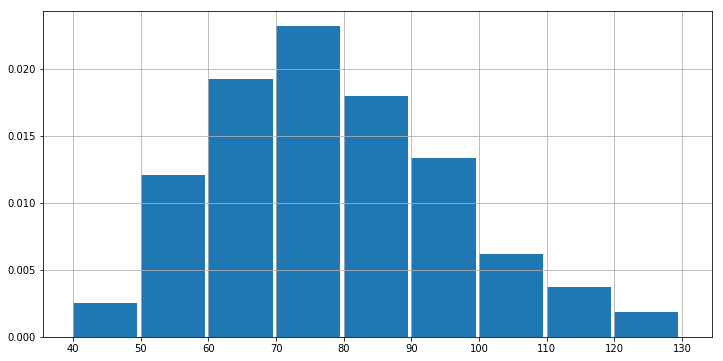

In [24]:
plt.figure(figsize=(12,6))
valori,bordi,_=plt.hist(data['weight'], bins=[40,50,60,70,80,90,100,110,120,130], 
                   width=9.5, density=True)
plt.xticks(bordi)
plt.grid()
plt.show()

Possiamo verificare che la condizione 

\begin{equation}
\sum_{i=0}^{n} b_i \cdot w_i = 1
\end{equation}

sia effettivamente soddisfatta:

In [25]:
larghezze = bordi[1:]-bordi[:-1]
print(larghezze) #tutti i bin hanno la stessa larghezza
print((larghezze*valori).sum()) #colcoliamo la somma dei prodotti

[10 10 10 10 10 10 10 10 10]
1.0


> **🙋‍♂️ Domanda 9**
>
> Utilizzare l'istogramma sopra per ottenere la probabilità che un soggetto abbia un peso compreso tra $40Kg$ e $50Kg$.

Gli istogrammi possono essere visualizzati anche direttamente da `DataFrame`:

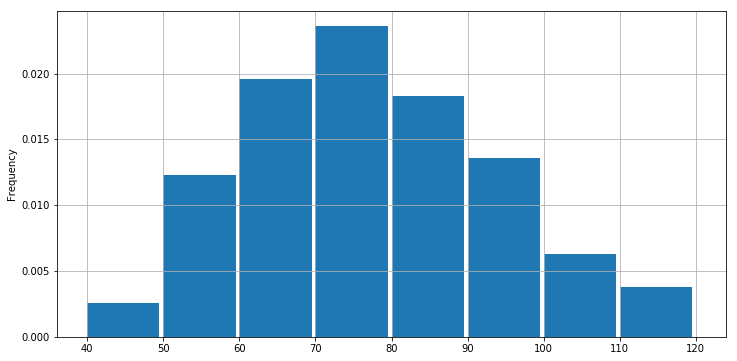

In [26]:
data['weight'].plot.hist(figsize=(12,6), width=9.5, 
                         density='True',
                         bins=[40,50,60,70,80,90,100,110,120])
plt.grid()
plt.show()

La funzione prende gli stessi parametri in input della funzione `hist` di matplotlib. Tuttavia, a differenza di essa, non restituisce i valori dei bin e i rispettivi bordi. 

### Stima della densità

Esistono delle tecniche che permettono di stimare in maniera non parametrica (non vengono ciò fatte assunzioni sulla natura della distribuzione dei dati) la densità di probabilità seguita dai dati. Queste tecniche permettono di ottenere una versione più "continua" di un istogramma. Possiamo stimare e plottare le densità mediante Pandas come segue:

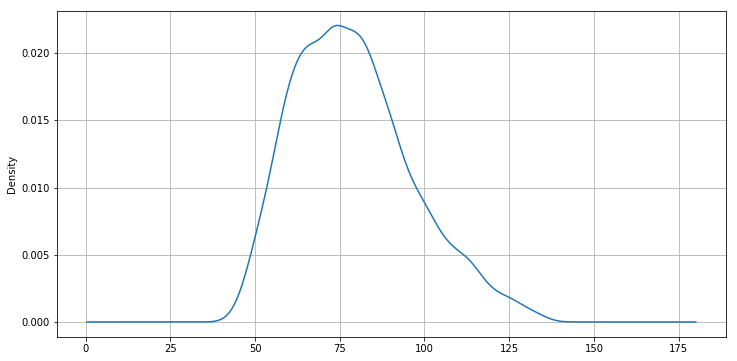

In [27]:
data['weight'].plot.density(figsize=(12,6))
plt.grid()
plt.show()

Confrontiamo la stima della densità con l'istogramma:

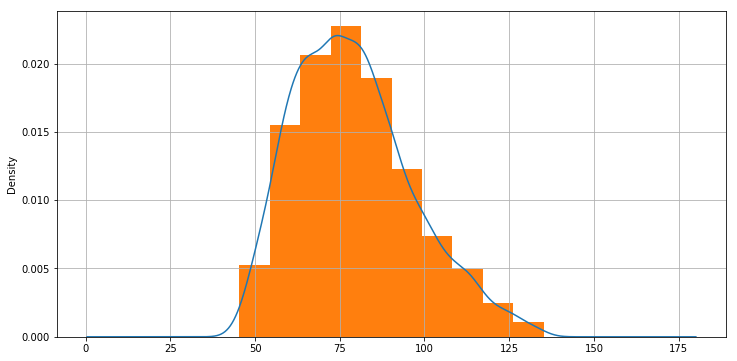

In [28]:
a=data['weight'].plot.density(figsize=(12,6))
plt.hist(data['weight'], density=True)
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 10**
>
> Si confronti il plot di densità visto sopra con istogrammi ottenuti con diversi numeri di bin. Qual è il vantaggio principale della stima della densità?

### Confrontare campioni mediante istogrammi

Gli istogrammi possono essere utili per comparare campioni. Confrontiamo ad esempio gli istogrammi del campione dei pesi degli uomini e del campione dei pesi delle donne:

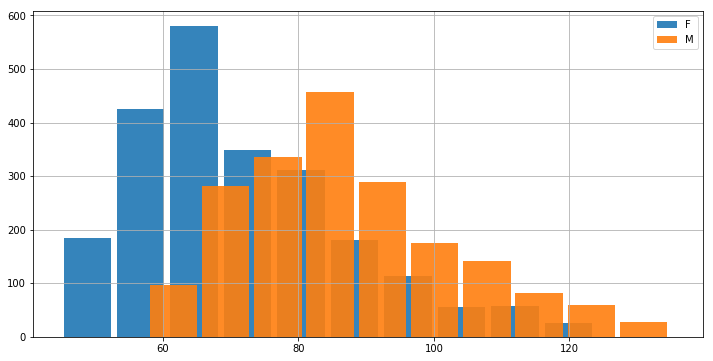

In [29]:
plt.figure(figsize=(12,6))
plt.hist(data[data['sex']=='F']['weight'], width=7, alpha=0.9)
plt.hist(data[data['sex']=='M']['weight'], width=7, alpha=0.9)
plt.legend(['F','M'])
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 11**
>
> Si metta in relazione il plot dei due istogrammi con il plot delle dure relative CDF. I due plot sono concordi? Quali dei due plot è più immediato?

E' possibile effettuare plot combinati simili direttamente da `Pandas` utilizzando il `groupby`:

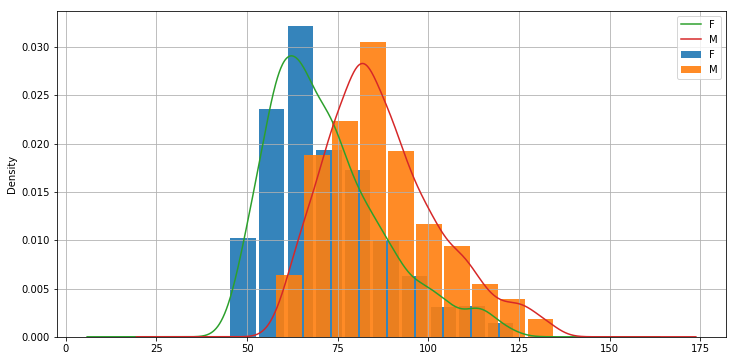

In [30]:
data.groupby('sex')['weight'].plot.hist(width=7, alpha=0.9, density=True, figsize=(12,6))
data.groupby('sex')['weight'].plot.density()
plt.legend()
plt.grid()
plt.show()

## Visualizzazioni

Abbiamo visto che i grafici a barre possono essere utilizzati per graficare le frequenze assolute e relative dei dati. Vediamo adesso alcune altre visualizzazioni che fanno uso di grafici a barre e grafici a torta per confrontare diverse quantità. Per iniziare a discutere di visualizzazioni, utilizzeremo il dataset Titanic caricato precedentemente.

Mostriamo le prime righe del dataset:

In [31]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Barplot

Oltre a mostrare le frequenze dei dati, i barplot possono essere utili per confrontare diverse quantità numeriche. Supponiamo di voler confrontare il numero di donne e uomini a bordo del Titanic. Possiamo calcolare questi numeri mediante un `groupby`:

In [32]:
titanic.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Possiamo confrontare queste due quantità visivamente mediante un barplot come segue:

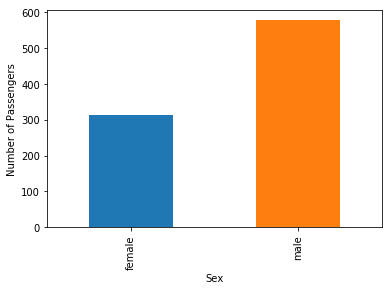

In [33]:
titanic.groupby('Sex')['Sex'].count().plot.bar()
plt.ylabel('Number of Passengers')
plt.show()

Confrontiamo adesso le età medie dei passeggeri imbarcati nelle varie classi. Costruiamo prima una tabella riassuntiva mediante `groupby`:

In [34]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Possiamo confrontare le quantità ottenute graficamente mediante barplot:

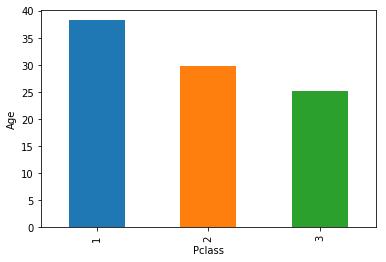

In [35]:
titanic.groupby('Pclass')['Age'].mean().plot.bar()
plt.ylabel('Age')
plt.show()

Calcoliamo il numero di sopravvissuti per classe di imbarco:

In [36]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Per ottenere delle percentuali, possiamo normalizzare per righe come segue:

In [37]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Ogni riga della tabella riporta la percentuale di sopravvissuti (1) e la percentuale di non sopravvissuti (0). Visualizziamo un grafico a barre della tabella:

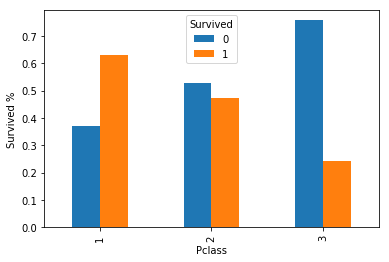

In [38]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index').plot.bar()
plt.ylabel('Survived %')
plt.show()

Un grafico spesso utile a confrontare grandezze complementari (come nel caso delle percentuali viste sopra) è lo "stacked bar plot". Per ottenere questo grafico bisogna passare `stacked=True` al metodo `bar`:

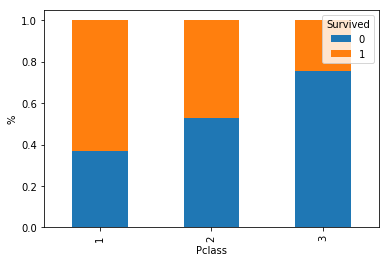

In [39]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index').plot.bar(stacked=True)
plt.ylabel('%')
plt.show()

Possiamo mettere in relazione anche più variabili. Ad esempio:

In [40]:
pd.crosstab([titanic['Pclass'], titanic['Sex']], titanic['Survived'], normalize='index')

Survived              0         1
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

Il relativo plot sarà:

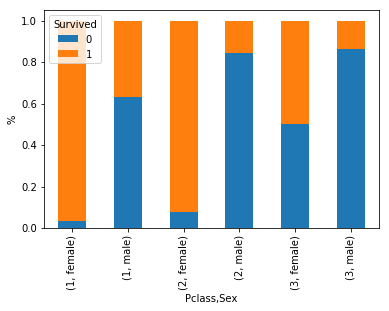

In [41]:
pd.crosstab([titanic['Pclass'], titanic['Sex']], titanic['Survived'], normalize='index').plot.bar(stacked=True)
plt.ylabel('%')
plt.show()

> **🙋‍♂️ Domanda 12**
>
> Si confrontino mediante un barplot le età medie dei passeggeri per classe di imbarco e sesso.

Così come per i barplot, è possibile confrontare gli istogrammi di diversi campioni di dati. Confrontiamo le distribuzioni delle età distinte per sesso:

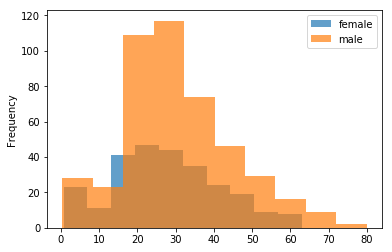

In [42]:
titanic.groupby('Sex')['Age'].plot.hist(alpha=0.7)
#alpha=0.7 serve a mostrare gli istogrammi come semi-trasparenti
plt.legend()
plt.show()

In maniera simile, si possono confrontare densità:

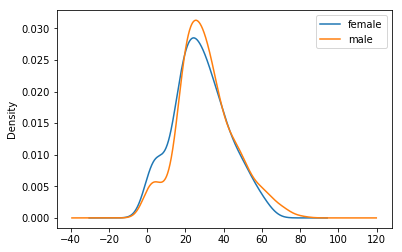

In [43]:
titanic.groupby('Sex')['Age'].plot.density()
#alpha=0.7 serve a mostrare gli istogrammi come semi-trasparenti
plt.legend()
plt.show()

### Grafici a Torta

I grafici a torta vengono utilizzati per confrontare diverse quantità **senza imporre** un ordinamento a priori. Supponiamo ad esempio di voler confrontare il numero di sopravvissuti in rispetto ai due sessi. Iniziamo ottenendo una tabella che riassume i numeri da confrontare:

Possiamo plottare un grafico a torta come segue:

In [44]:
titanic.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

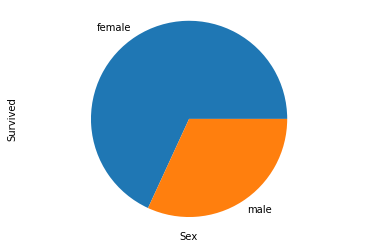

In [45]:
titanic.groupby('Sex')['Survived'].sum().plot.pie()
plt.xlabel('Sex')
plt.axis('equal')
plt.show()

> **🙋‍♂️ Domanda 13**
>
> Costruire un grafico a torta che confronti il numero di sopravvissuti nelle varie classi di imbarco.

## Esercizi

> 🧑‍💻 Esercizio 1
> 
> Considerando il dataset Titanic, si mostrino i diagrammi a barre delle frequenze assolute e relative dei valori della colonna `Pclass`. Scegliendo a caso tra i passeggeri, qual è la probabilità che egli si sia imbarcato in seconda classe?

> 🧑‍💻 Esercizio 2
> 
> Considerando il dataset Titanic, si mostri l'istogramma delle età dei passeggeri imbarcati in prima classe. Si utilizzi un criterio opportuno per scegliere il numero di bin.

> 🧑‍💻 Esercizio 3
> 
> Si modifichi il plot dell'esercizio precedente per costruire un istogramma che permetta di rispondere alla domanda "se scelgo casualmente un passeggero imbarcato in prima classe, qual è la probabilità che la sua età sia compresa tra $20$ e $30$ anni?

> 🧑‍💻 Esercizio 4
> 
> Considerando il dataset Titanic, si confrontino le distribuzioni cumulative delle età dei passeggeri imbarcati nelle varie classi. Le distribuzioni sono simili? In quale classe sono imbarcati i soggetti più giovani?

> 🧑‍💻 Esercizio 5
> 
> Considerando il dataset Titanic, si mostrino con uno stacked bar plot le percentuali di passeggeri appartenenti alle tre classi separatamente per i due sessi. Si notano differenze nella ripartizione?